In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [3]:
#unique values in each column
df.nunique()


Date              1611
Mode                12
Category            50
Subcategory         90
Note              1057
Amount             550
Income/Expense       3
Currency             1
dtype: int64

In [4]:
#unique values in Mode column
df['Mode'].unique()

array(['Cash', 'Saving Bank account 1', 'Credit Card',
       'Equity Mutual Fund B', 'Debit Card', 'Share Market Trading',
       'Saving Bank account 2', 'Equity Mutual Fund C',
       'Equity Mutual Fund A', 'Equity Mutual Fund D', 'Fixed Deposit',
       'Recurring Deposit'], dtype=object)

In [5]:
#Drop Date column
df.drop('Date', axis=1, inplace=True)
df.columns

Index(['Mode', 'Category', 'Subcategory', 'Note', 'Amount', 'Income/Expense',
       'Currency'],
      dtype='object')

In [6]:
#drop Currency and Note columns
df.drop(['Currency', 'Note'], axis=1, inplace=True)
df.columns

Index(['Mode', 'Category', 'Subcategory', 'Amount', 'Income/Expense'], dtype='object')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22280\4223202681.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])


<AxesSubplot: xlabel='Amount', ylabel='Density'>

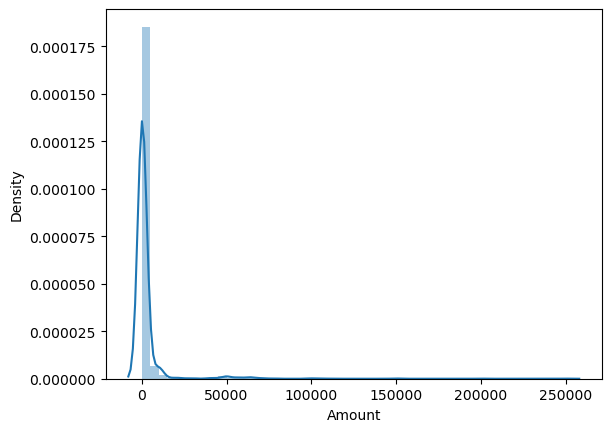

In [7]:
#distribution of Amount column
sns.distplot(df['Amount'])


In [8]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Mode'] = le.fit_transform(df['Mode'])
df['Subcategory'] = le.fit_transform(df['Subcategory'])
df['Category'] = le.fit_transform(df['Category'])
df['Income/Expense'] = le.fit_transform(df['Income/Expense'])


In [9]:
#select target variable
y = df['Amount']
X = df.drop('Amount', axis=1)

In [10]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mode            2461 non-null   int32  
 1   Category        2461 non-null   int32  
 2   Subcategory     2461 non-null   int32  
 3   Amount          2461 non-null   float64
 4   Income/Expense  2461 non-null   int32  
dtypes: float64(1), int32(4)
memory usage: 57.8 KB


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [13]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 222670675.3394619
Mean Absolute Error (MAE): 4654.339650994169
R-squared Score: 0.10161380770032602

Results for Decision Tree:
Mean Squared Error (MSE): 95623658.71670832
Mean Absolute Error (MAE): 1767.3545106485276
R-squared Score: 0.6141971792320575

Results for Random Forest:
Mean Squared Error (MSE): 100630869.14311516
Mean Absolute Error (MAE): 1781.2750451350175
R-squared Score: 0.593995108608411

Results for SVR:
Mean Squared Error (MSE): 257290288.05732256
Mean Absolute Error (MAE): 3155.639663591905
R-squared Score: -0.03806233960139438

Results for XGBoost:
Mean Squared Error (MSE): 94560686.14679986
Mean Absolute Error (MAE): 1781.388702130751
R-squared Score: 0.6184858439973807

Results for LightGBM:
Mean Squared Error (MSE): 137762305.27502623
Mean Absolute Error (MAE): 2228.4501320973695
R-squared Score: 0.4441847688754794

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 85225332.61804552
Mean A

In [14]:
accuracy

[0.10161380770032602,
 0.6141971792320575,
 0.593995108608411,
 -0.03806233960139438,
 0.6184858439973807,
 0.4441847688754794,
 0.6561502230076985,
 0.4497289543917339,
 0.4507186450326004,
 -0.02905349298422344,
 0.6646661337382723]

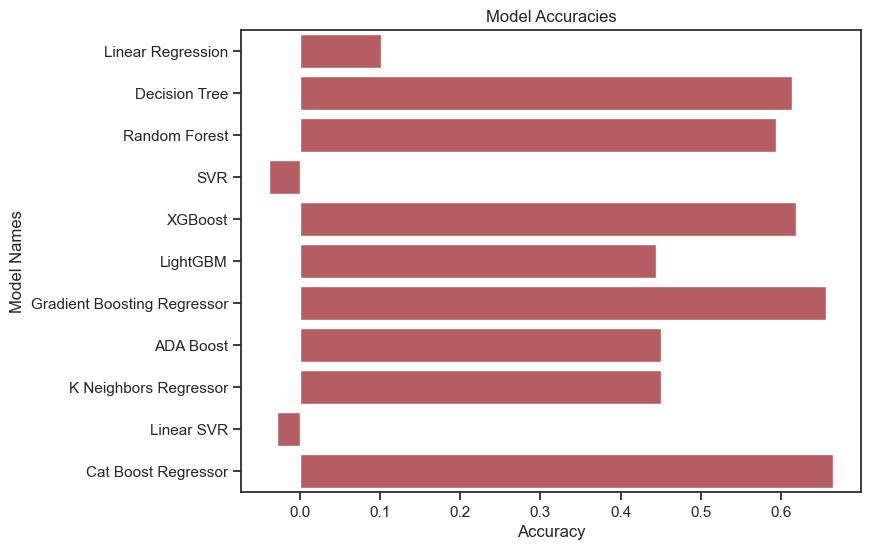

In [15]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

The best value for k neighbors in regression is: 1 with an R-squared score of 0.6125


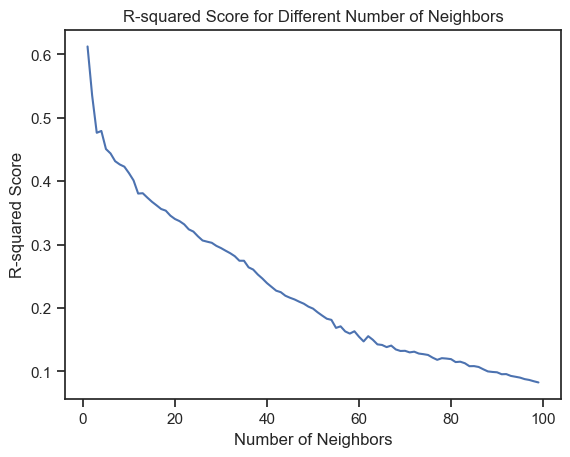

In [17]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in regression is: {best_k} with an R-squared score of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()